In [1]:
import pandas as pd
about_game=pd.read_csv('game_form.csv')


In [2]:
# make sure each game as only one label
# if there is drop the last the was given
about_game=about_game.drop_duplicates(subset=["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"], keep="first")
assert(about_game.duplicated().sum()==0)

In [3]:
about_game.head()

,Timestamp,עמישם התצפיתן,שם קבוצה מארחת,שם קבוצה אורחת,תאריך המשחק,שעת המשחק,שם האיצטדיון,זמן הגעה למשחק,זמן המתנה בתור,קללות מחוץ למגרש,...,Unnamed: 61,רמת האלימות.8,אירוע.7,מה סיבת האירוע.5,דקה.8,Unnamed: 66,מספר הכרטיסים הצהובים לקבוצת הבית,מספר הכרטיסים האדומים לקבוצת הבית,מספר הכרטיסים הצהובים לקבוצת המתארחת,מספר הכרטיסים האדומים לקבוצת המתארחת
0,07/09/2017 12:36:42,ספיר מסיקה,ביתר,אשדוד,28/08/2017,00:20:00,NaN,00:00:20,00:00:40,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,3,1
1,07/09/2017 18:06:08,סתיו שר שלום,"בית""ר ירושלים",מ.ס. אשדוד,28/08/2017,20:30:00,המושבה,00:40:00,00:05:00,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,3,1
2,09/09/2017 19:55:48,ספי,מכבי תל אביב,בני סכנין,09/09/2017,18:00:00,נתניה,18:13:00,00:00:00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,4,0
3,10/09/2017 08:06:57,ספיר מסיקה,אשדוד,קרית שמונה,09/09/2017,15:19:00,איצדטיון אשדוד,00:30:00,00:00:00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,4,0
4,13/09/2017 11:40:04,סתיו שר שלום,מכבי פתח תקווה,ביתר ירושלים,11/09/2017,00:21:00,המושבה,00:30:00,00:05:00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,1,1


In [4]:
# geting the metta data on the game
game_meta=["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"]
violence_labels=[col for col in about_game if (col.startswith('רמת האלימות'))]
cards_labels=['מספר הכרטיסים הצהובים לקבוצת הבית','מספר הכרטיסים האדומים לקבוצת המתארחת','מספר הכרטיסים האדומים לקבוצת הבית','מספר הכרטיסים הצהובים לקבוצת הבית']
about_game=about_game[cards_labels+violence_labels+game_meta]


In [5]:
# fixing the events level to bins to to event level
# mapping to the bin
def bin_map(x):
    if not pd.isnull(x):
        if x<4:
            return 1.0
        else:
            return 2.0
    return 0.0

# mapping all null levels to 0
def value_map(x):
    if pd.isnull(x):
        return 0.0
    return x

about_game[violence_labels]=about_game[violence_labels].applymap(value_map)


In [6]:
## start working on the groups merge ##
## function that fixing the group name
groups_names=['בני_סכנין','ביתר_ירושלים','מכבי_תל_אביב','מס_אשדוד','הפועל_חיפה','מכבי_פתח_תקווה','קרית_שמונה','הפועל_אשקלון','מכבי_נתניה','בני_יהודה','עכו','באר_שבע','רעננה','מכבי_חיפה','נס_ציונה','רמת_גן' ,'נצרת']
def fixer(x):
    if (x in ['בית"ר ירושלים','ביתר ','ביתר ירושלים','בית"ר','בית"ר ','ביתר','בית"ר ירושלים ']):
        return groups_names[1]
    elif (x in ['מכבי תל אביב','מכבי ת"א']):
        return groups_names[2]
    elif (x in ['בני סכנין','בי סכנין','סכנין']):
        return groups_names[0]
    elif (x in ['מ.ס. אשדוד','אשדוד','מ.ס אשדוד','מס אשדוד','מ. ס. אשדוד','מ.ס.ע אשדוד','מ.ס. אשדוד ']):
        return groups_names[3]
    elif (x in ['הפועל חיפה','הפועל חיפה ','הפעול חיפה','פועל חיפה']):
        return groups_names[4]
    elif (x in ['מכבי פתח תקווה','מכבי פ"ת','מכבח פתח תקווה','מכבי פתח','מכבי  פתח תקווה','פתח תקווה','מכבי פתח תקוה','מכבי פ.ת.','מכבי פ.ת', 'מכבי פ.ת. ']):
        return groups_names[5]
    elif (x in ['קרית שמונה','הפועל קריית שמונה','עירוני קריית שמונה','עירוני קרית שמונה','הפועל קרית שמונה','עירוני ק"ש ','הפועל ק"ש','עירוני ק"ש','קריית שמונה']):
        return groups_names[6]
    elif (x in ['הפועל אשקלון','אשקלון ']):
        return groups_names[7]
    elif (x in ['מכבי נתניה','מכבי נתניה ','נתניה']):
        return groups_names[8]
    elif (x in ['בני יהודה תל אביב','בני יהודה','בני יהודה ת"א']):
        return groups_names[9]
    elif (x in ['הפועל עכו','עכו','הפועל עכן']):
        return groups_names[10]
    elif (x in ['באר שבע','הפועל באר שבע','הפועל ב"ש','הפועל ב"ש ']):
        return groups_names[11]
    elif (x in ['הפועל רעננה']):
        return groups_names[12]
    elif (x in ['מכבי חיפה ','מכבי חיפה']):
        return groups_names[13]
    return x

about_game[['שם קבוצה אורחת','שם קבוצה מארחת']]=about_game[['שם קבוצה אורחת','שם קבוצה מארחת']].applymap(fixer)

#all name of groups
groups_value_in_label=pd.unique(about_game[['שם קבוצה אורחת','שם קבוצה מארחת']].values.ravel())


In [7]:
# games without events
about_game.loc[about_game.loc[:,violence_labels].sum(axis=1)==0]

,מספר הכרטיסים הצהובים לקבוצת הבית,מספר הכרטיסים האדומים לקבוצת המתארחת,מספר הכרטיסים האדומים לקבוצת הבית,מספר הכרטיסים הצהובים לקבוצת הבית,רמת האלימות,רמת האלימות.1,רמת האלימות.2,רמת האלימות.3,רמת האלימות.4,רמת האלימות.5,רמת האלימות.6,רמת האלימות.7,רמת האלימות.8,שם קבוצה מארחת,שם קבוצה אורחת,תאריך המשחק
6,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ביתר_ירושלים,קרית_שמונה,25/09/2017
32,2,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,מכבי_נתניה,רעננה,30/12/2017
71,5,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,מכבי_נתניה,מכבי_תל_אביב,04/03/2018


In [8]:
#loading all the execel file
from os import listdir,path

mypath='facebook_set/'
dataframes=[]
for filename in listdir(mypath):
    if  'xlsx' in filename:
        current=pd.read_excel(path.join(mypath,filename))
        dataframes.append(current)
        print("loading: "+str(path.join(mypath,filename))+" with size= "+str(current.shape))
    
ecxels= pd.concat(dataframes)
print ("Total size is= "+str(ecxels['מועד המשחק'].count()))
ecxels=ecxels.drop('Unnamed: 68',axis=1)

loading: facebook_set/hifa.xlsx with size= (36, 101)
loading: facebook_set/ranana.xlsx with size= (33, 101)
loading: facebook_set/מכבי חיפה ליגת העל.xlsx with size= (33, 101)
loading: facebook_set/משחקים של ביתר.xlsx with size= (37, 101)
loading: facebook_set/עותק של פתח תקווה כדורגל -.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים בני סכנין.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים הפועל אשקלון.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים מ.ס. אשדוד.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים מכבי נתניה.xlsx with size= (36, 101)
loading: facebook_set/קובץ ריכוז נתונים - מכבי תל אביב עונה 17-18.xlsx with size= (36, 100)
loading: facebook_set/קובץ ריכוז נתונים בני יהודה עונה 17-18.xlsx with size= (36, 100)
loading: facebook_set/קובץ ריכוז נתונים הפועל עכו עונה 17 18.xlsx with size= (32, 100)
loading: facebook_set/קובץ ריכוז נתונים- קרית שמונה כדורגל.xlsx with size= (33, 101)
loading: facebook_set/ריכוז נתונים הפועל באר שבע 17

In [9]:
# drop the column that not needed
ecxels.drop(columns='שעה',inplace=True)

In [10]:
# fixing all the teams name
ecxels[['מארחת','אורחת']]=ecxels[['מארחת','אורחת']].applymap(fixer)


In [11]:
# removeing groups that aren't in this leage
groups_value_in_data=pd.unique(ecxels[['מארחת','אורחת']].values.ravel())
remove=[item for item in groups_value_in_data if item not in groups_value_in_label]
print("groups not in this track = "+str(remove))
ecxels=ecxels[~ecxels['מארחת'].isin(remove)]
ecxels=ecxels[~ecxels['אורחת'].isin(remove)]

groups not in this track = ['הפועל פ"ת', 'מאריבור', 'לוגאנו', 'ויקטוריה פלזן', 'סטיאווה בוקרשט', 'אחי נצרת', 'הפועל רמת גן']


In [12]:
# fixing dates
ecxels['מועד המשחק']=pd.to_datetime(ecxels['מועד המשחק'],format='%d-%m-%Y')
about_game['תאריך המשחק']=pd.to_datetime(about_game['תאריך המשחק'],format='%d/%m/%Y')

# checking the size sample
assert(ecxels['מועד המשחק'].count()>about_game['תאריך המשחק'].count())

#fixing columns names to be the same
about_game.rename({'תאריך המשחק': 'מועד המשחק','שם קבוצה אורחת': 'אורחת', 'שם קבוצה מארחת': 'מארחת'}, axis='columns',inplace=True)



In [13]:
# if two rows cover the same game, join them the one , then remove droplicates
# from diffrent vectors for two groups in the same match to a single vector contain both of the group vectors
assert(ecxels.shape[1]==99)
ecxels=pd.merge(ecxels, ecxels, on=['אורחת','מארחת','מועד המשחק']).drop_duplicates(subset=['אורחת','מארחת','מועד המשחק'],keep="first")
assert(ecxels.shape[1]==195)


In [14]:
ecxels.head()

,אורחת,כמות ביטויי אלימות מילולית. 0-24 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 130- 154 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 154-178 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 24-48 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 3 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 48-72 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 72-96 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 96-130 שעות לפני המשחק_x,כמות ביטויי דרמטיזציה. 0-24 שעות לפני המשחק_x,...,כמות לייקים לרגשות חיוביים. 72-96 שעות לפני המשחק_y,כמות לייקים לרגשות חיוביים. 96-130 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 0-24 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 130-154 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 154-178 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 24-48 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 3 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 48-72 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 72-96 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 96-130 שעות לפני המשחק_y
0,הפועל_אשקלון,4,0,0,0,1.0,0,0,1,11,...,0.0,0.0,0,0,0,0,1.0,2,0,0
4,הפועל_חיפה,5,6,1,2,0.0,1,2,2,11,...,4.0,0.0,0,0,1,0,0.0,1,0,3
8,בני_יהודה,3,0,0,3,1.0,1,2,1,8,...,0.0,3.0,1,0,0,0,0.0,0,0,4
12,הפועל_חיפה,7,1,1,0,1.0,5,1,0,40,...,10.0,0.0,0,0,0,0,0.0,0,0,0
16,באר_שבע,1,4,4,0,0.0,0,1,2,11,...,3.0,2.0,0,0,0,0,0.0,0,0,0


In [15]:
# print the games without vectors, but without labels
facebok_and_label=pd.merge(ecxels,about_game,how='right',on=['אורחת','מארחת','מועד המשחק'])
facebok_and_label.loc[facebok_and_label.loc[:,violence_labels].isnull().any(axis=1)][['מארחת','אורחת','מועד המשחק']]



,מארחת,אורחת,מועד המשחק


In [16]:
# merge with label raw data 
final_df=pd.merge(ecxels,about_game,how='inner',on=['אורחת','מארחת','מועד המשחק'])
print("number of samples= "+str(final_df.shape[0]) +" number of features= "+str(final_df.shape[1]) )
assert(final_df.shape[1]==(195+9+4)) # feature before + violance + crads

number of samples= 78 number of features= 208


In [17]:
# remove all nan, and check this

import numpy as np
final_df_copy=final_df.copy()
columns_before_drop=final_df_copy.index
# remove samples with nan 
final_df=final_df_copy.dropna(axis=0,how='any')
removed=[item for item in columns_before_drop if item not in final_df.index]
print("number of smaples that was removed="+ str(len(removed)))
assert(final_df.isna().sum().sum()==0)



number of smaples that was removed=10


In [18]:
# all rows with a null values
final_df_copy.loc[removed,:][['אורחת','מארחת','מועד המשחק']]

,אורחת,מארחת,מועד המשחק
39,ביתר_ירושלים,באר_שבע,2018-02-25
40,עכו,ביתר_ירושלים,2018-03-04
41,ביתר_ירושלים,רעננה,2018-03-11
42,מכבי_נתניה,ביתר_ירושלים,2018-03-17
43,בני_יהודה,ביתר_ירושלים,2018-04-08
44,מכבי_תל_אביב,ביתר_ירושלים,2018-04-16
45,ביתר_ירושלים,מכבי_נתניה,2018-04-30
46,באר_שבע,ביתר_ירושלים,2018-05-05
47,הפועל_חיפה,ביתר_ירושלים,2018-05-09
48,ביתר_ירושלים,מכבי_תל_אביב,2018-05-15


In [19]:
# SORT AND THEN DROP non numric values
final_df=final_df.sort_values(by='מועד המשחק') 
final_df=final_df._get_numeric_data()
final_df.head()
assert(final_df.shape[1]==205)

In [20]:
# getting for each game the violance events level and the number of tickets
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt


In [21]:
#build the vectors that will be used in the clustering
classtering_violece_data=final_df[cards_labels+violence_labels]

# build the vectors that will be the pradicating features
facebook_values=final_df.drop(cards_labels+violence_labels, axis=1)
print("number of samples are= "+str(facebook_values.shape[0]) +" with number of features= "+str(facebook_values.shape[1]))
assert(facebook_values.shape[1]==96*2)

number of samples are= 68 with number of features= 192


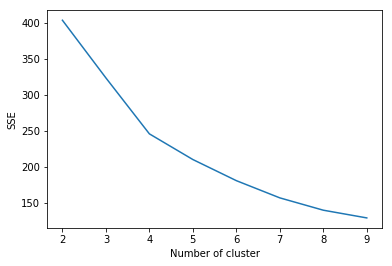

In [22]:
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
dis={}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit(classtering_violece_data)
    dis[i]=cluster_labels.inertia_
plt.figure()
plt.plot(list(dis.keys()), list(dis.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# the plot indicate 4 clusters

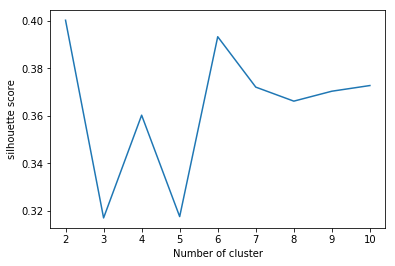

In [23]:
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
# need to look on the peak
sil_coeff={}
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(classtering_violece_data)
    label = kmeans.labels_
    sil_coeff[n_cluster] = silhouette_score(classtering_violece_data, label, metric='euclidean')
plt.figure()
plt.plot(list(sil_coeff.keys()), list(sil_coeff.values()))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette score")
plt.show()
# the plot indicate 2 clusters


In [24]:
#so, we need to choose between 2 and 4 and 6 (our function) clusters
# we will draw them both and decaid


# acording to the elbow method 
kmeans2= KMeans(n_clusters=2).fit_predict(classtering_violece_data)
# acording to the silhouette score
kmeans4 = KMeans(n_clusters=4).fit_predict(classtering_violece_data)
# acording to the number of class we deceide
kmeans6 = KMeans(n_clusters=6).fit_predict(classtering_violece_data)





In [25]:
# pca to draw the data 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clf=pca.fit(facebook_values)
pca_data=clf.fit_transform(facebook_values)


In [26]:
# our original level
max_violence=final_df.loc[:,violence_labels].max(axis=1)

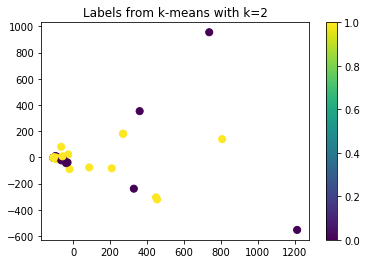

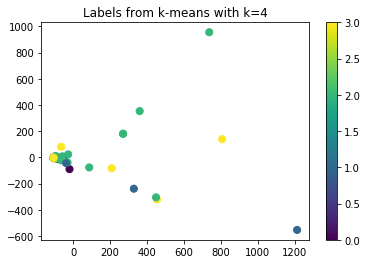

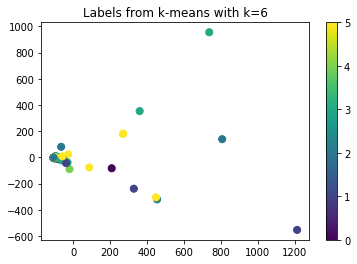

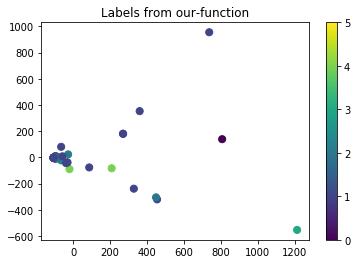

In [27]:
plt.figure(1)
plt.title('Labels from k-means with k=2')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans2,
            s=50, cmap='viridis');
cb = plt.colorbar()

plt.figure(2)

plt.title('Labels from k-means with k=4')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans4,
            s=50, cmap='viridis');
cb = plt.colorbar()

plt.figure(3)

plt.title('Labels from k-means with k=6')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans6,
            s=50, cmap='viridis');
cb = plt.colorbar()


plt.figure(4)
plt.title('Labels from our-function')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=max_violence,
            s=50, cmap='viridis');
cb = plt.colorbar()


In [28]:
# write to csv the cluster selection
clusters_compare=pd.concat([final_df,pd.DataFrame(data=kmeans2,columns=['kmeans2']),pd.DataFrame(data=kmeans4,columns=['kmeans4']),pd.DataFrame(data=kmeans6,columns=['kmeans6'])],axis=1)
clusters_compare.head()
clusters_compare.to_csv(encoding='utf-8',path_or_buf='clusters.csv')

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np
# BUILD THE FUNCTION THAT DO 5 FOLEDS AS AMIT ASKED
# this function don't fit regression, build a new function to regression
def split_by_label(X,Y,the_test_size):
    X_train_folds=[np.array([]),np.array([]),np.array([]),np.array([]),np.array([])]
    X_test_folds=[np.array([]),np.array([]),np.array([]),np.array([]),np.array([])]#[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    Y_train_folds=[np.array([]),np.array([]),np.array([]),np.array([]),np.array([])]#[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    Y_test_folds=[np.array([]),np.array([]),np.array([]),np.array([]),np.array([])]#[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]

    
    classes=np.unique(Y)
   # print(classes)
    fold_inedx=0
    for clas in classes:
        all_samples=X[np.where( Y == clas )]
        for i in range(5):
            X_train, X_test, y_train, y_test = train_test_split(all_samples,pd.DataFrame([clas]*len(all_samples),columns=['label']),test_size=the_test_size,shuffle=True)
            
            X_train_folds[i]= np.concatenate((X_train,X_train_folds[i]), axis=0) if X_train_folds[i].size else X_train
            X_test_folds[i]=np.concatenate((X_test,X_test_folds[i]), axis=0)   if X_test_folds[i].size else X_test
            Y_train_folds[i]=np.concatenate((y_train,Y_train_folds[i]), axis=0)  if Y_train_folds[i].size else y_train
            Y_test_folds[i]=np.concatenate((y_test,Y_test_folds[i]), axis=0) if Y_test_folds[i].size else y_test
            
    return X_train_folds,X_test_folds,Y_train_folds,Y_test_folds

from sklearn.model_selection import KFold

def split_5_fold(X,Y,the_test_size):
    X_train_folds=[np.array([]),np.array([]),np.array([]),np.array([]),np.array([])]
    X_test_folds=[np.array([]),np.array([]),np.array([]),np.array([]),np.array([])]
    Y_train_folds=[np.array([]),np.array([]),np.array([]),np.array([]),np.array([])]
    Y_test_folds=[np.array([]),np.array([]),np.array([]),np.array([]),np.array([])]
    kf = KFold(n_splits=5)
    i=0
    for train_indexs, test_indexs in kf.split(X):
            X_train_folds[i]=X[train_indexs]
            X_test_folds[i]=X[test_indexs]
            Y_train_folds[i]=Y[train_indexs]  
            Y_test_folds[i]=Y[test_indexs]
            i=i+1
    return X_train_folds,X_test_folds,Y_train_folds,Y_test_folds

    
def five_fold_avg_classifction(clf,X,Y,test_size,scoring_function=(lambda clf,x,y:clf.score(x, y))):
    X_train_folds,X_test_folds,Y_train_folds,Y_test_folds=split_by_label(X, Y,the_test_size=test_size)
    socre_values=[]
    fp_values=[]
    for  X_train, X_test, y_train, y_test in zip(X_train_folds,X_test_folds,Y_train_folds,Y_test_folds):
        clf=clf.fit(X_train, y_train.ravel()) 
        SVC_score=scoring_function(clf,X_test,y_test)
        socre_values.append(SVC_score)
        # get fp counts
        cm1 = confusion_matrix(clf.predict(X_test), y_test)
        FalsePositive = []
        for i in range(len(np.unique(Y))):
            FalsePositive.append(sum(cm1[:,i]) - cm1[i,i])
        fp_values.append(FalsePositive)
    return np.average(socre_values),np.average(fp_values, axis=0).ravel(),clf

def five_fold_avg_regresion(clf,X,Y,test_size,scoring_function=(lambda clf,x,y:clf.score(x, y))):
    X_train_folds,X_test_folds,Y_train_folds,Y_test_folds=split_5_fold(X, Y,the_test_size=test_size) # replace it with a proper split
    socre_values=[]
    fp_values=[]
    for  X_train, X_test, y_train, y_test in zip(X_train_folds,X_test_folds,Y_train_folds,Y_test_folds):
        clf=clf.fit(X_train, y_train) 
        SVC_score=scoring_function(clf,X_test,y_test)
        socre_values.append(SVC_score)
    return np.average(socre_values)

from sklearn.metrics import r2_score

def custem_score(clf,x,y):
    y_pred=clf.predict(x)
    y_pred=np.around(y_pred)
    return r2_score(y, y_pred)

def custem_score_ceil(clf,x,y):
    y_pred=clf.predict(x)
    y_pred=np.ceil(y_pred)
    return r2_score(y, y_pred)
    
def custem_score_floor(clf,x,y):
    y_pred=clf.predict(x)
    y_pred=np.floor(y_pred)
    return r2_score(y, y_pred)
    


In [30]:
# count the size of the class
def class_size(Y):
    unique, counts = np.unique(Y, return_counts=True)
    return dict(zip(unique, counts))


In [31]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler

def regression_estimation(X,Y,multi=False):
    Y = np.array(Y).astype(int)
    print("---------- regression---------")
    #SVR USING DEEFRENT scoring function
    socre=five_fold_avg_regresion(MultiOutputRegressor(svm.SVR(kernel='rbf')) if multi else svm.SVR(kernel='rbf'),X, Y, test_size=0.33)
    closest_socre=five_fold_avg_regresion(MultiOutputRegressor(svm.SVR(kernel='rbf')) if multi else svm.SVR(kernel='rbf'),X,Y, test_size=0.33,scoring_function=custem_score)
    ceil_socre=five_fold_avg_regresion(MultiOutputRegressor(svm.SVR(kernel='rbf')) if multi else svm.SVR(kernel='rbf'),X, Y, test_size=0.33,scoring_function=custem_score_ceil)
    floor_socre=five_fold_avg_regresion(MultiOutputRegressor(svm.SVR(kernel='rbf')) if multi else svm.SVR(kernel='rbf'),X, Y, test_size=0.33,scoring_function=custem_score_floor)
    print("svr- avg score with normal rmse = "+str(socre))
    print("svr- avg score with round the closest = "+str(closest_socre))
    print("svr- avg score with ceil  = "+str(ceil_socre))
    print("svr- avg score with floor = "+str(closest_socre))
    
    # RANDOM FORAST REGRSSTION
    socre=five_fold_avg_regresion(RandomForestRegressor(max_depth=10, random_state=0),X, Y.ravel(), test_size=0.33)
    print("random forest - avg score with normal rmse = "+str(socre))
    print("------------------------------")


In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

def classification_estimation(X,Y):
    if (len(Y[0].shape)!=0):
        print("we are hoping to a vector of size n row with 1 value each row")
        print("if you are tring to do classification to more then on class the stupid, create one class")
        return 
    if ((type(X) is not np.ndarray) or (type(Y) is not np.ndarray) ):
        print("we are hoping to get only numpy arrays please use: .values")
        return 
    Y = np.array(Y).astype(int)
    print("----------classification------")
    socre,fp,clf=five_fold_avg_classifction(svm.SVC(decision_function_shape='ovo',class_weight='balanced'),X, Y, test_size=0.33)
    print("svc - avg score is= "+str(socre))
    socre,fp,clf=five_fold_avg_classifction(RandomForestClassifier(max_depth=10, random_state=0),X, Y, test_size=0.33)
    print("RandomForest - avg score is= "+str(socre))
    l=np.arange(len(np.unique(Y)))

    
    print("------------------------------")
    pred_class=class_size(clf.predict(X))
    true_class=class_size(Y)
    
    plt.figure(figsize=(20,10))
    plt.subplot(1, 3, 1)
    # Plot
    plt.pie(true_class.values(), labels=true_class.keys(),
        autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.title('true class')
    plt.subplot(1, 3, 2)
    # Plot
    plt.pie(pred_class.values(), labels=pred_class.keys(),
        autopct='%1.1f%%', shadow=True, startangle=140)
    
    plt.axis('equal')
    plt.title('pred class')
    plt.show()
    plt.figure(figsize=(20,10))
    plt.subplot(1, 3, 3)
    plt.pie(fp, labels=l,
        autopct='%1.1f%%', shadow=True, startangle=140)
    
    plt.axis('equal')
    plt.title('flase positive count')
    plt.show()


----------classification------
svc - avg score is= 0.125
RandomForest - avg score is= 0.29166666666666663
------------------------------


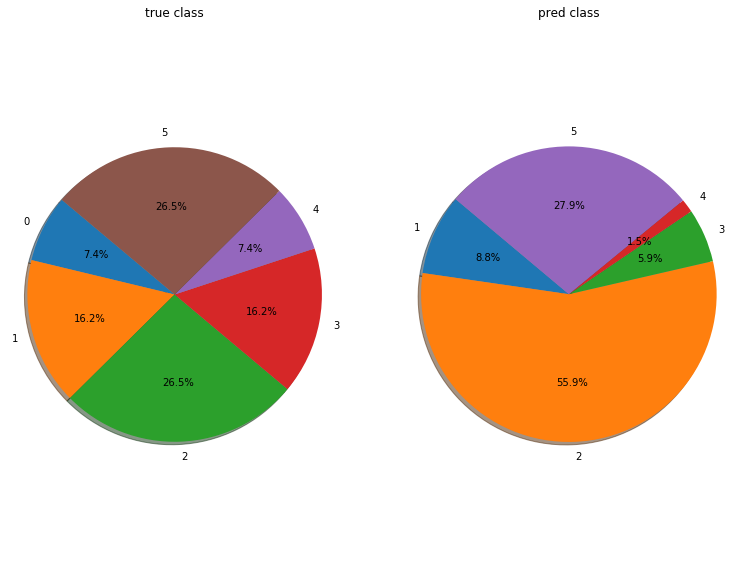

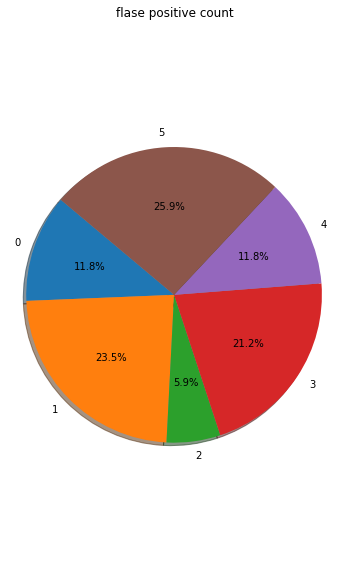

---------- regression---------
svr- avg score with normal rmse = -0.13263040747699936
svr- avg score with round the closest = -0.2587694207914741
svr- avg score with ceil  = -0.05118601960921447
svr- avg score with floor = -0.2587694207914741
random forest - avg score with normal rmse = -0.299549630354471
------------------------------


In [33]:
# using the labels from the clustering with 6 clusters
classification_estimation(facebook_values.values, kmeans6)
regression_estimation(facebook_values.values, kmeans6)

----------classification------
svc - avg score is= 0.33333333333333337
RandomForest - avg score is= 0.33333333333333337
------------------------------


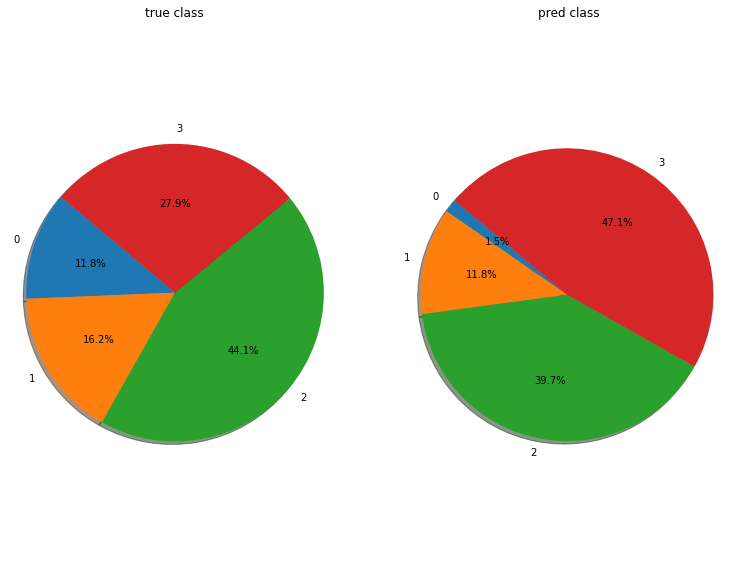

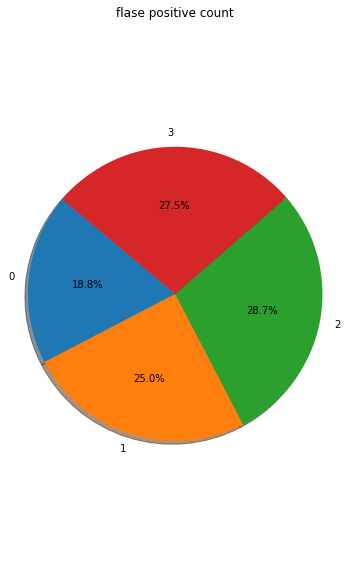

---------- regression---------
svr- avg score with normal rmse = -0.13960787020231663
svr- avg score with round the closest = -0.06146665018160195
svr- avg score with ceil  = -1.2057526802526475
svr- avg score with floor = -0.06146665018160195
random forest - avg score with normal rmse = -0.31804393303468476
------------------------------


In [34]:
#calssifaction, using the labels from the clustering with 4 clusters 
classification_estimation(facebook_values.values, kmeans4)
regression_estimation(facebook_values.values, kmeans4)

----------classification------
svc - avg score is= 0.5826086956521739
RandomForest - avg score is= 0.5739130434782609
------------------------------


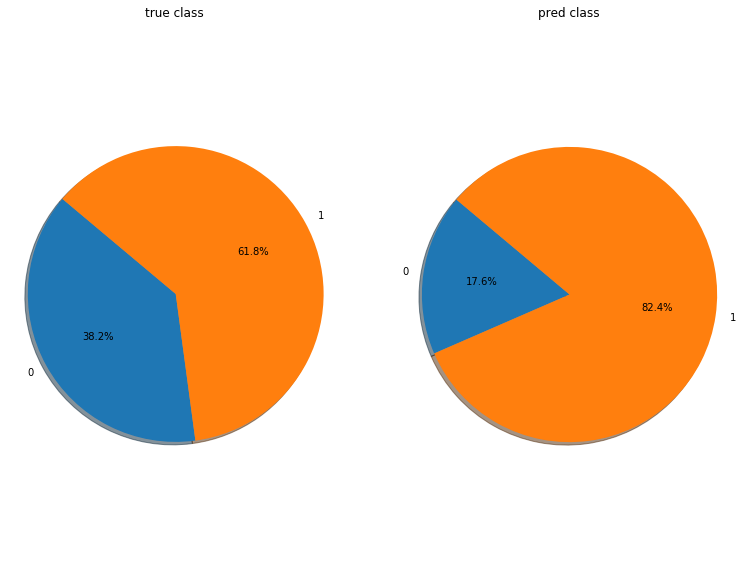

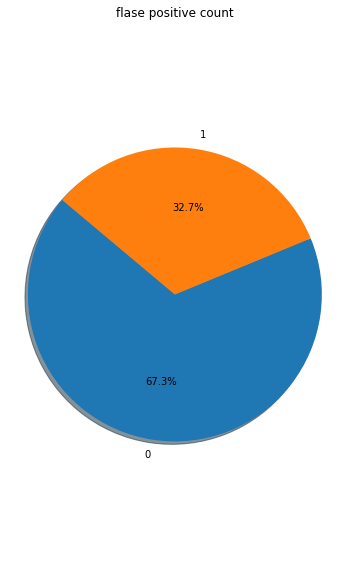

---------- regression---------
svr- avg score with normal rmse = -0.2635069123642422
svr- avg score with round the closest = -1.2560245310245308
svr- avg score with ceil  = -0.6620851370851369
svr- avg score with floor = -1.2560245310245308
random forest - avg score with normal rmse = -0.23504868553367148
------------------------------


In [35]:
# using the labels from the clustering with 2 clusters
classification_estimation(facebook_values.values, kmeans2)
regression_estimation(facebook_values.values, kmeans2)

----------classification------
svc - avg score is= 0.256
RandomForest - avg score is= 0.584
------------------------------


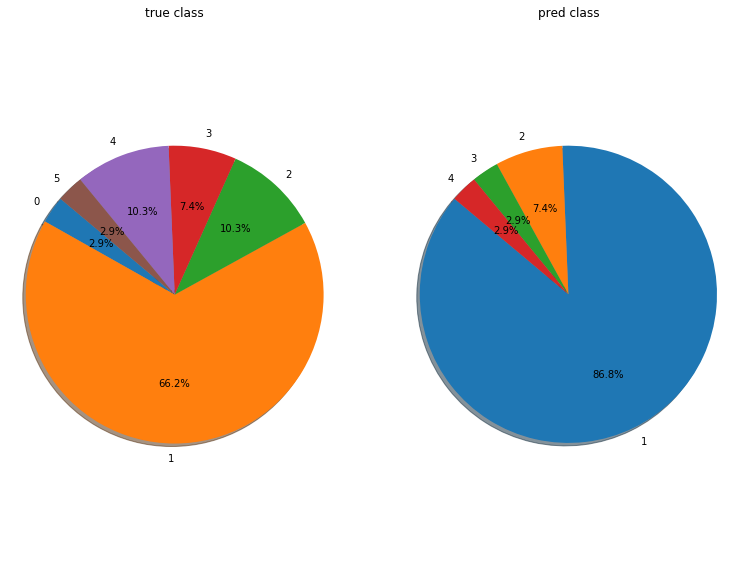

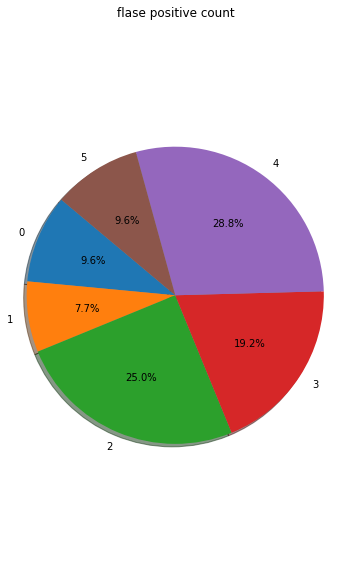

---------- regression---------
svr- avg score with normal rmse = -0.10910685246266283
svr- avg score with round the closest = -0.302492096940147
svr- avg score with ceil  = -0.38606564783613045
svr- avg score with floor = -0.302492096940147
random forest - avg score with normal rmse = -0.37162223123755134
------------------------------


In [36]:
# tring to preform a regression to the max of the level of violance
classification_estimation(facebook_values.values, max_violence.values)
regression_estimation(facebook_values.values, max_violence.values)

In [37]:
# tring to preform a regression to the sum of the level of violance
#sum_violence=final_df.loc[:,violence_labels].sum(axis=1)
#regression_estimation(facebook_values,sum_violence.values)
#classification_estimation(facebook_values,sum_violence.values)

In [38]:
# tring to preform a regression to the mean of the level of violance
#mean_violence=final_df.loc[:,violence_labels].mean(axis=1)
#regression_estimation(facebook_values,mean_violence)
#classification_estimation(facebook_values,mean_violence.map(lambda x: x*10))


In [39]:
# tring to preform a regression to the statistical values of the level of violance
stat_labels=pd.DataFrame()
stat_labels['sum']=final_df.loc[:,violence_labels].sum(axis=1)
stat_labels['mean']=final_df.loc[:,violence_labels].mean(axis=1)
stat_labels['std']=final_df.loc[:,violence_labels].std(axis=1)
stat_labels['max']=final_df.loc[:,violence_labels].max(axis=1)
regression_estimation(facebook_values.values,stat_labels.values,multi=True)


---------- regression---------
svr- avg score with normal rmse = -0.10068705735243193
svr- avg score with round the closest = 0.02770339805493438
svr- avg score with ceil  = -2.4773428772639963
svr- avg score with floor = 0.02770339805493438
random forest - avg score with normal rmse = -1.3061879420607596
------------------------------


In [40]:
# tring to preforem a regression to the each event value
regression_estimation(facebook_values.values,final_df.loc[:,violence_labels].values,multi=True)


---------- regression---------
svr- avg score with normal rmse = 0.37194354485377523
svr- avg score with round the closest = 0.5624375083083898
svr- avg score with ceil  = -0.1865061766475311
svr- avg score with floor = 0.5624375083083898
random forest - avg score with normal rmse = 0.02781349945909648
------------------------------


In [41]:
# tring to preforem a regression to the cards values
regression_estimation(facebook_values.values,final_df.loc[:,cards_labels].values,multi=True)


---------- regression---------
svr- avg score with normal rmse = -0.14853455376866925
svr- avg score with round the closest = -0.3511931974922321
svr- avg score with ceil  = -1.4416294107268943
svr- avg score with floor = -0.3511931974922321
random forest - avg score with normal rmse = -0.06585525459346478
------------------------------


In [42]:
# tring to preforem a regression to the each event value + the cards values
regression_estimation(facebook_values.values,final_df.loc[:,violence_labels+cards_labels].values,multi=True)


---------- regression---------
svr- avg score with normal rmse = 0.1637523054047975
svr- avg score with round the closest = 0.19698522598814092
svr- avg score with ceil  = -0.6885554702792763
svr- avg score with floor = 0.19698522598814092
random forest - avg score with normal rmse = -0.38831013404001713
------------------------------
